In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [247]:
np.random.seed(1)
x = np.random.randn(100)
y = x - 2 * (x**2) + np.random.randn(100)
X = x.reshape(-1,1)

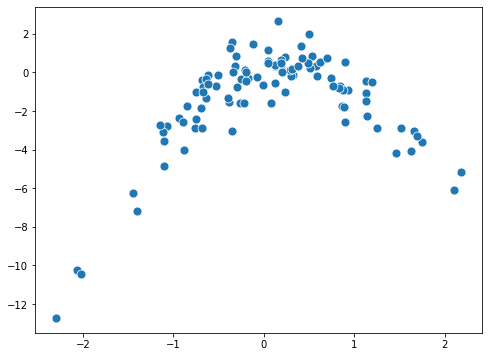

In [248]:
plt.figure(figsize=(8,6))
sb.scatterplot(x=x, y=y, s=80);

In [249]:
# Perform LOOCV using KFold for n_splits = n
def kfold_result(degree, X, y, k_fold):
    crossvalidation = KFold(n_splits=k_fold, shuffle=False)
    X_current = PolynomialFeatures(degree=degree).fit_transform(X)
    model = LinearRegression()
    scores = cross_val_score(model, X_current, y, cv=crossvalidation, scoring='neg_mean_squared_error')
    print('Mean Squared error: %.5f' %np.mean(np.abs(scores)))

In [250]:
for i in range(1,5):
    kfold_result(i, X, y, 5)

Mean Squared error: 6.46172
Mean Squared error: 0.89728
Mean Squared error: 0.93279
Mean Squared error: 0.88995


In [251]:
# Degree 2 have smallest LOOCV error, as expected

In [252]:
X_2 = PolynomialFeatures(degree=2).fit_transform(X)
lm = sm.OLS(y, X_2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     304.9
Date:                Sun, 11 Oct 2020   Prob (F-statistic):           1.47e-42
Time:                        20:26:57   Log-Likelihood:                -134.42
No. Observations:                 100   AIC:                             274.8
Df Residuals:                      97   BIC:                             282.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1350      0.115      1.169      0.2

In [254]:
X_4 = PolynomialFeatures(degree=4).fit_transform(X)
lm = sm.OLS(y, X_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     163.0
Date:                Sun, 11 Oct 2020   Prob (F-statistic):           1.24e-41
Time:                        20:28:22   Log-Likelihood:                -130.63
No. Observations:                 100   AIC:                             271.3
Df Residuals:                      95   BIC:                             284.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3140      0.136      2.311      0.0

In [253]:
# Result have coef and p-value for each predictors as expected